<a href="https://colab.research.google.com/github/Umerfarooq122/Decision-Tree-vs-Random-Forest-in-Python/blob/main/Decision_Tree_Vs_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**


There exist various methodologies through which machine learning models arrive at decisions. Among these, Decision Trees and Random Forests stand out as prevalent decision-making techniques in ML. Consequently, there persists a perpetual state of confusion, comparison, and debate surrounding the choice between Random Forest and Decision Tree. Each method possesses its own set of merits, drawbacks, and particular applications, allowing us to select the most suitable one tailored to our specific needs and project requirements. This article aims to furnish you with comprehensive insights necessary for making this decision.

# **Decision Tree Vs Random Forest:**

Now in order to explain the difference among decision tree and random forest we will take the help of an example. Imagine a situation where a bank needs to decide whether to give a small loan to someone quickly. They look at the person's past borrowing and how they're doing financially. If they see the person hasn't paid back a loan before, they say no to the new loan. But here's the thing: the loan is so small compared to how much money the bank has, they could easily say yes without much risk. So, the bank misses out on making some money.

Then, a few days later, another person asks for a loan. This time, the bank tries a new way of deciding. Sometimes they look at the person's past borrowing first, and other times they check their financial situation and how much they want to borrow. After considering both things, they decide whether to give the loan. Even though this new way might take longer, it helps the bank make more money. It's a good example of how making decisions together can be better than just one way. Now, do you know what these two ways of deciding are called? These are decision trees and a random forest! The table below highlights some difference among both.

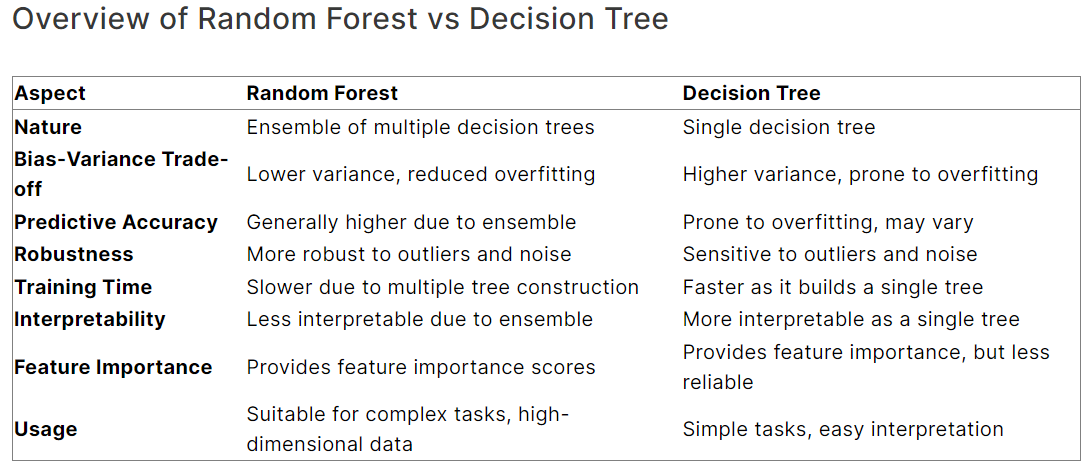

In [32]:
import requests
from io import BytesIO
from PIL import Image
url = 'https://raw.githubusercontent.com/Umerfarooq122/Decision-Tree-vs-Random-Forest-in-Python/main/DT%20vs%20RF.png'
page = requests.get(url)
Image.open(BytesIO(page.content))

# **With A Dataset:**

Let's take the help of a dataset that is similar to the example mentioned above and try to classify the output variable using both decision tree and random forest and see hoe they perform.

We’ll be working on the Loan Prediction dataset from Analytics Vidhya’s DataHack platform. This is a binary classification problem where we have to determine if a person should be given a loan or not based on a certain set of features.

So before any further due let's set up our environment and load the dataset.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

## **Loading the Dataset:**

The Dataset has been downloaded from Vidhya Analytics Website and has been stored in a github repository from where we will read the file.

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/Decision-Tree-vs-Random-Forest-in-Python/main/loadstatustrain.csv")

Now that our dataset has been loaded into the environment let's display the first few rows of our data set.

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Everything loaded perfectly but we can see that most of the column needs to be coded since it has characters as values. So before exploring the data we have preprocess the data.

## **Data Pre-processing:**

This is very important step espcially when it comes to modeling. We will deal with categorical varaibles and missing values.

I'll fill in the missing values in the categorical variables using the mode and in the continuous variables using the mean (for their respective columns). Additionally, we'll encode the categorical values in the data using label encoding. The below code cell gives us the data types and number of non null values count for each column

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


First of all let's impute the missing values.

In [37]:
df['Gender'].replace([np.nan], df['Gender'].mode()[0], inplace=True)
df['Married'].replace([np.nan], df['Married'].mode()[0], inplace=True)
df['Dependents'].replace([np.nan], df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].replace([np.nan], df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].replace([np.nan], df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].replace([np.nan], df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].replace([np.nan], df['Loan_Amount_Term'].mean(), inplace=True)

Now that the missing values are imputed we can go ahead and encode our categorical variables

In [38]:
df['Gender']= df['Gender'].astype('category')
df['Married']=df['Married'].astype('category')
df['Education']=df['Education'].astype('category')
df['Dependents']=df['Dependents'].astype('category')
df['Self_Employed']=df['Self_Employed'].astype('category')
df['Property_Area']=df['Property_Area'].astype('category')
df['Loan_Status']=df['Loan_Status'].astype('category')

In [39]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',3,inplace=True)
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [40]:
df['Gender'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [41]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Exploring the Data:**

### **Categorical Features:**

In [42]:
features_binary = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']

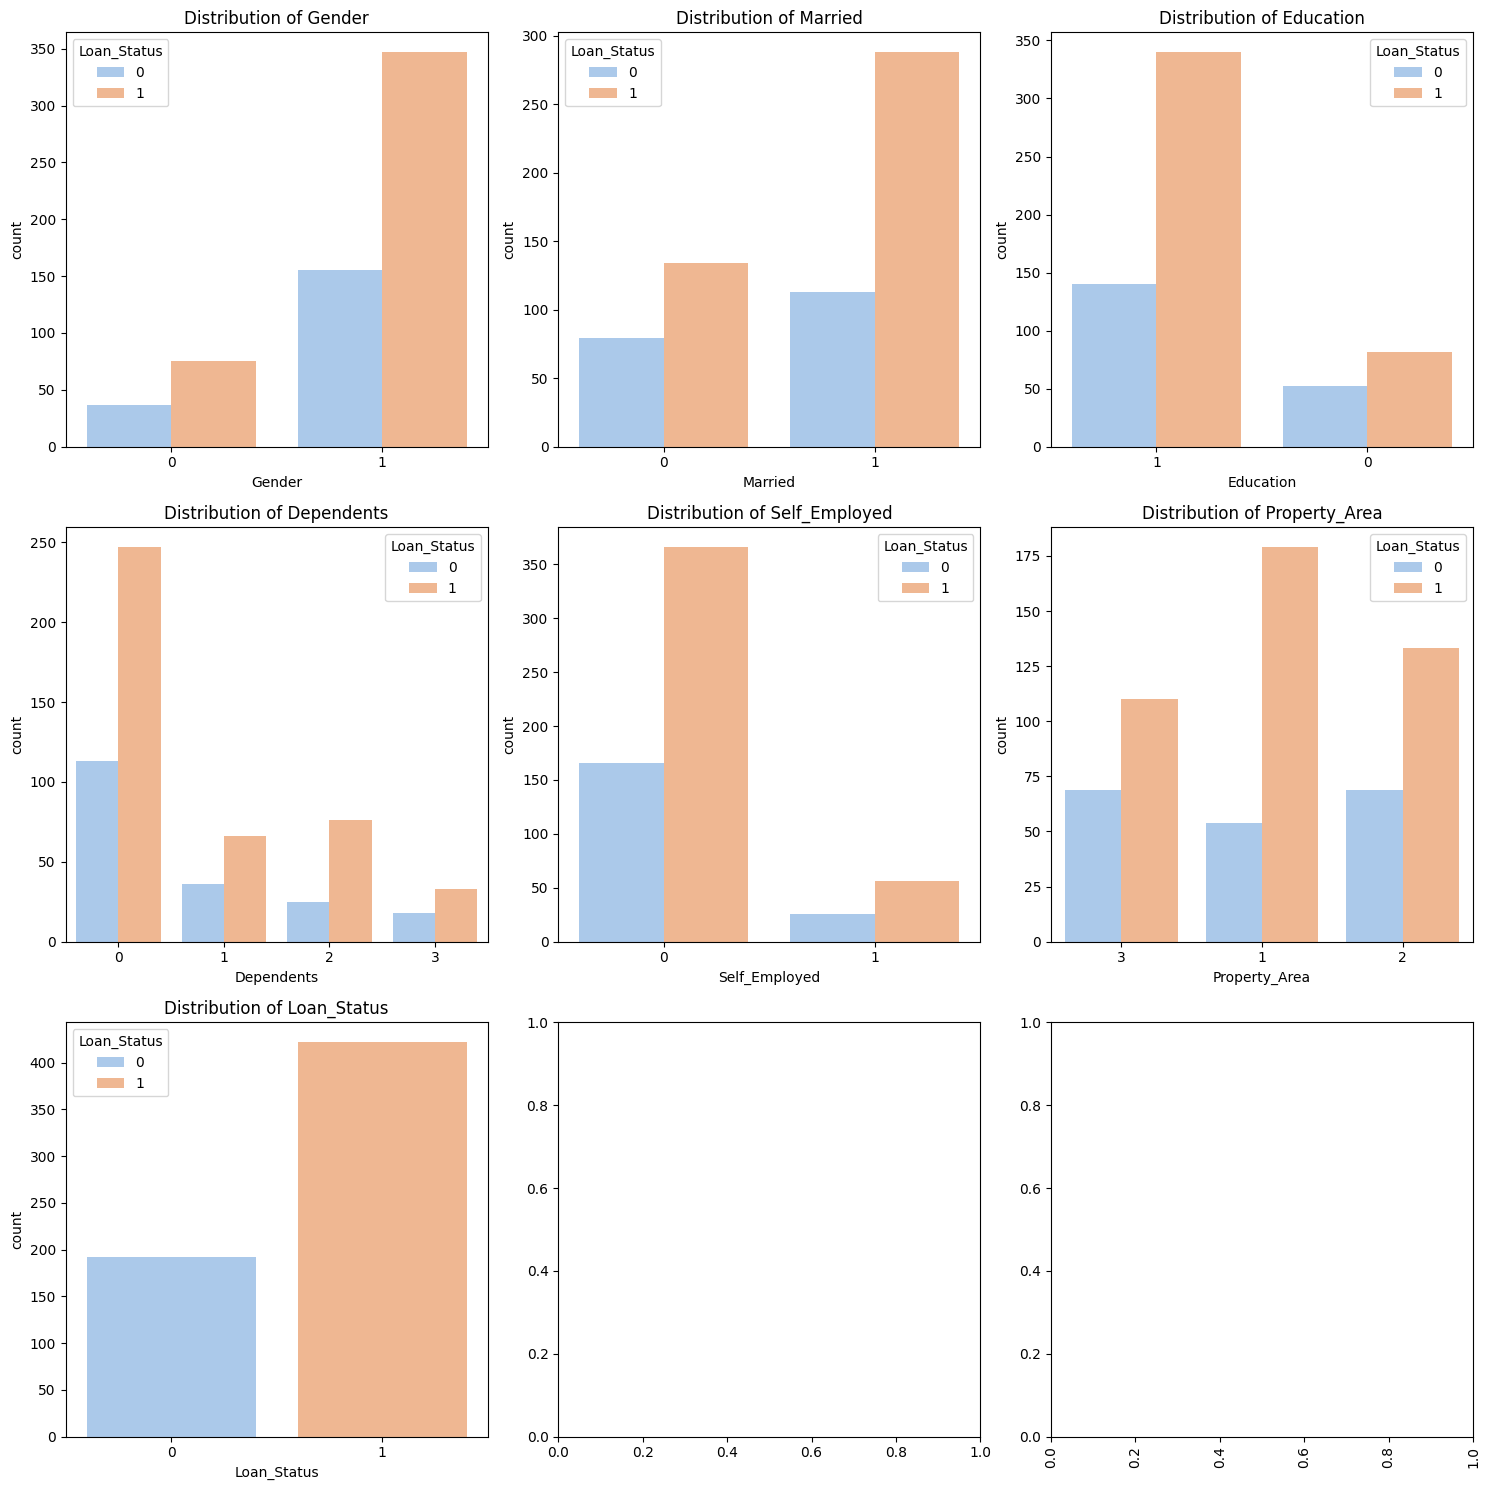

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)


for i, feature in enumerate(features_binary):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Loan_Status', data=df, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Distribution of {feature}')
    plt.xticks(rotation = 90)

plt.tight_layout()

plt.show()

### **Continuous Features:**

In [44]:
feat = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']

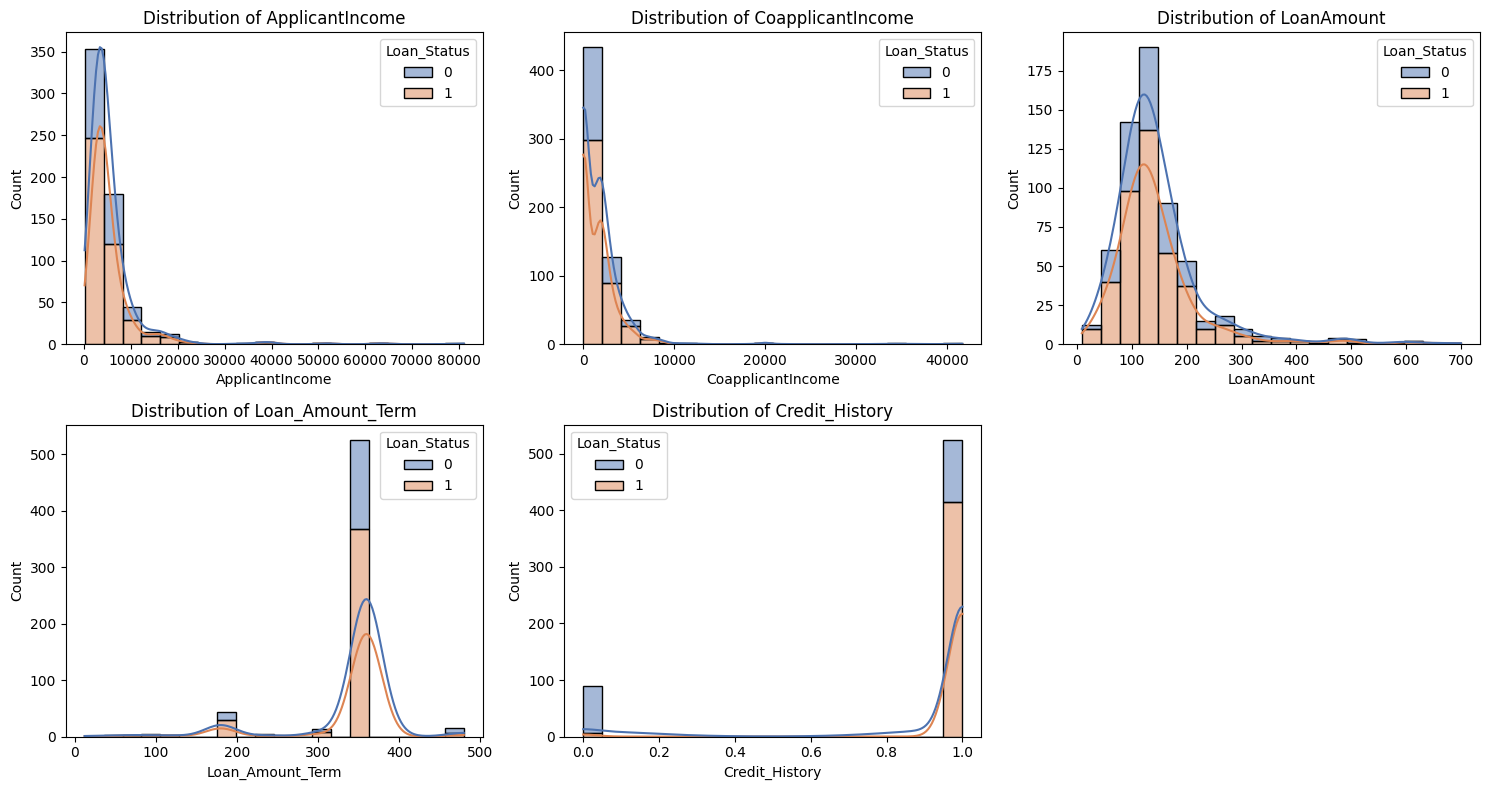

In [45]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(feat, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df, x=feature, kde=True, bins=20, hue='Loan_Status', multiple='stack', palette='deep')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

We can see that there is a lot of skewness in the data set and an imbalance to some extent too. We can resample and create an balanced data set but we shouldnt be worried about this that much since Decision Trees can naturally handle imbalanced datasets because they split the data based on the purity of the classes at each node. However, in cases of severe class imbalance, decision trees might tend to favor the majority class, leading to biased predictions. Similarly, Random Forests, being an ensemble of decision trees, also have some inherent ability to handle imbalanced data. Since they build multiple decision trees on bootstrapped samples of the data and average their predictions, they can provide more robust predictions than individual decision trees.

# **Building and Evaluating the Model:**

Now that we know what we are dealing with and our data is prepared so we can go ahead and create models based on decision trees and random forest to see how they perform. We will be selecting different features for both decision trees. In our first decision tree we will use all of the features from our variables and then in the second model we will pick the features that we think are more suitable for solving the problem at hand.

## **Splitting the Dataset:**

In this section we will split the dataset into X and Y. After that we X and Y into Xtrain, ytrain, Xtest and ytest. During the split we will drop `Load_ID` column since it just holds the ID of customers and may not be helpful in creating models. Similary our X will contain all the features or most of the features while Y will have our target or output variable.

In [46]:
X=df.drop(columns=['Loan_ID','Loan_Status']).values
Y=df['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Let's take a look at the shape of our splitted data.

In [47]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (491, 11)
Shape of X_test=> (123, 11)
Shape of Y_train=> (491,)
Shape of Y_test=> (123,)


## **Decision Tree Using all Features:**

### **Model:**

In [48]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

### **Plot of the Decision Tree:**
Let's plot of decision tree and which features were automatically picked by the algorithm and how the tree was built.

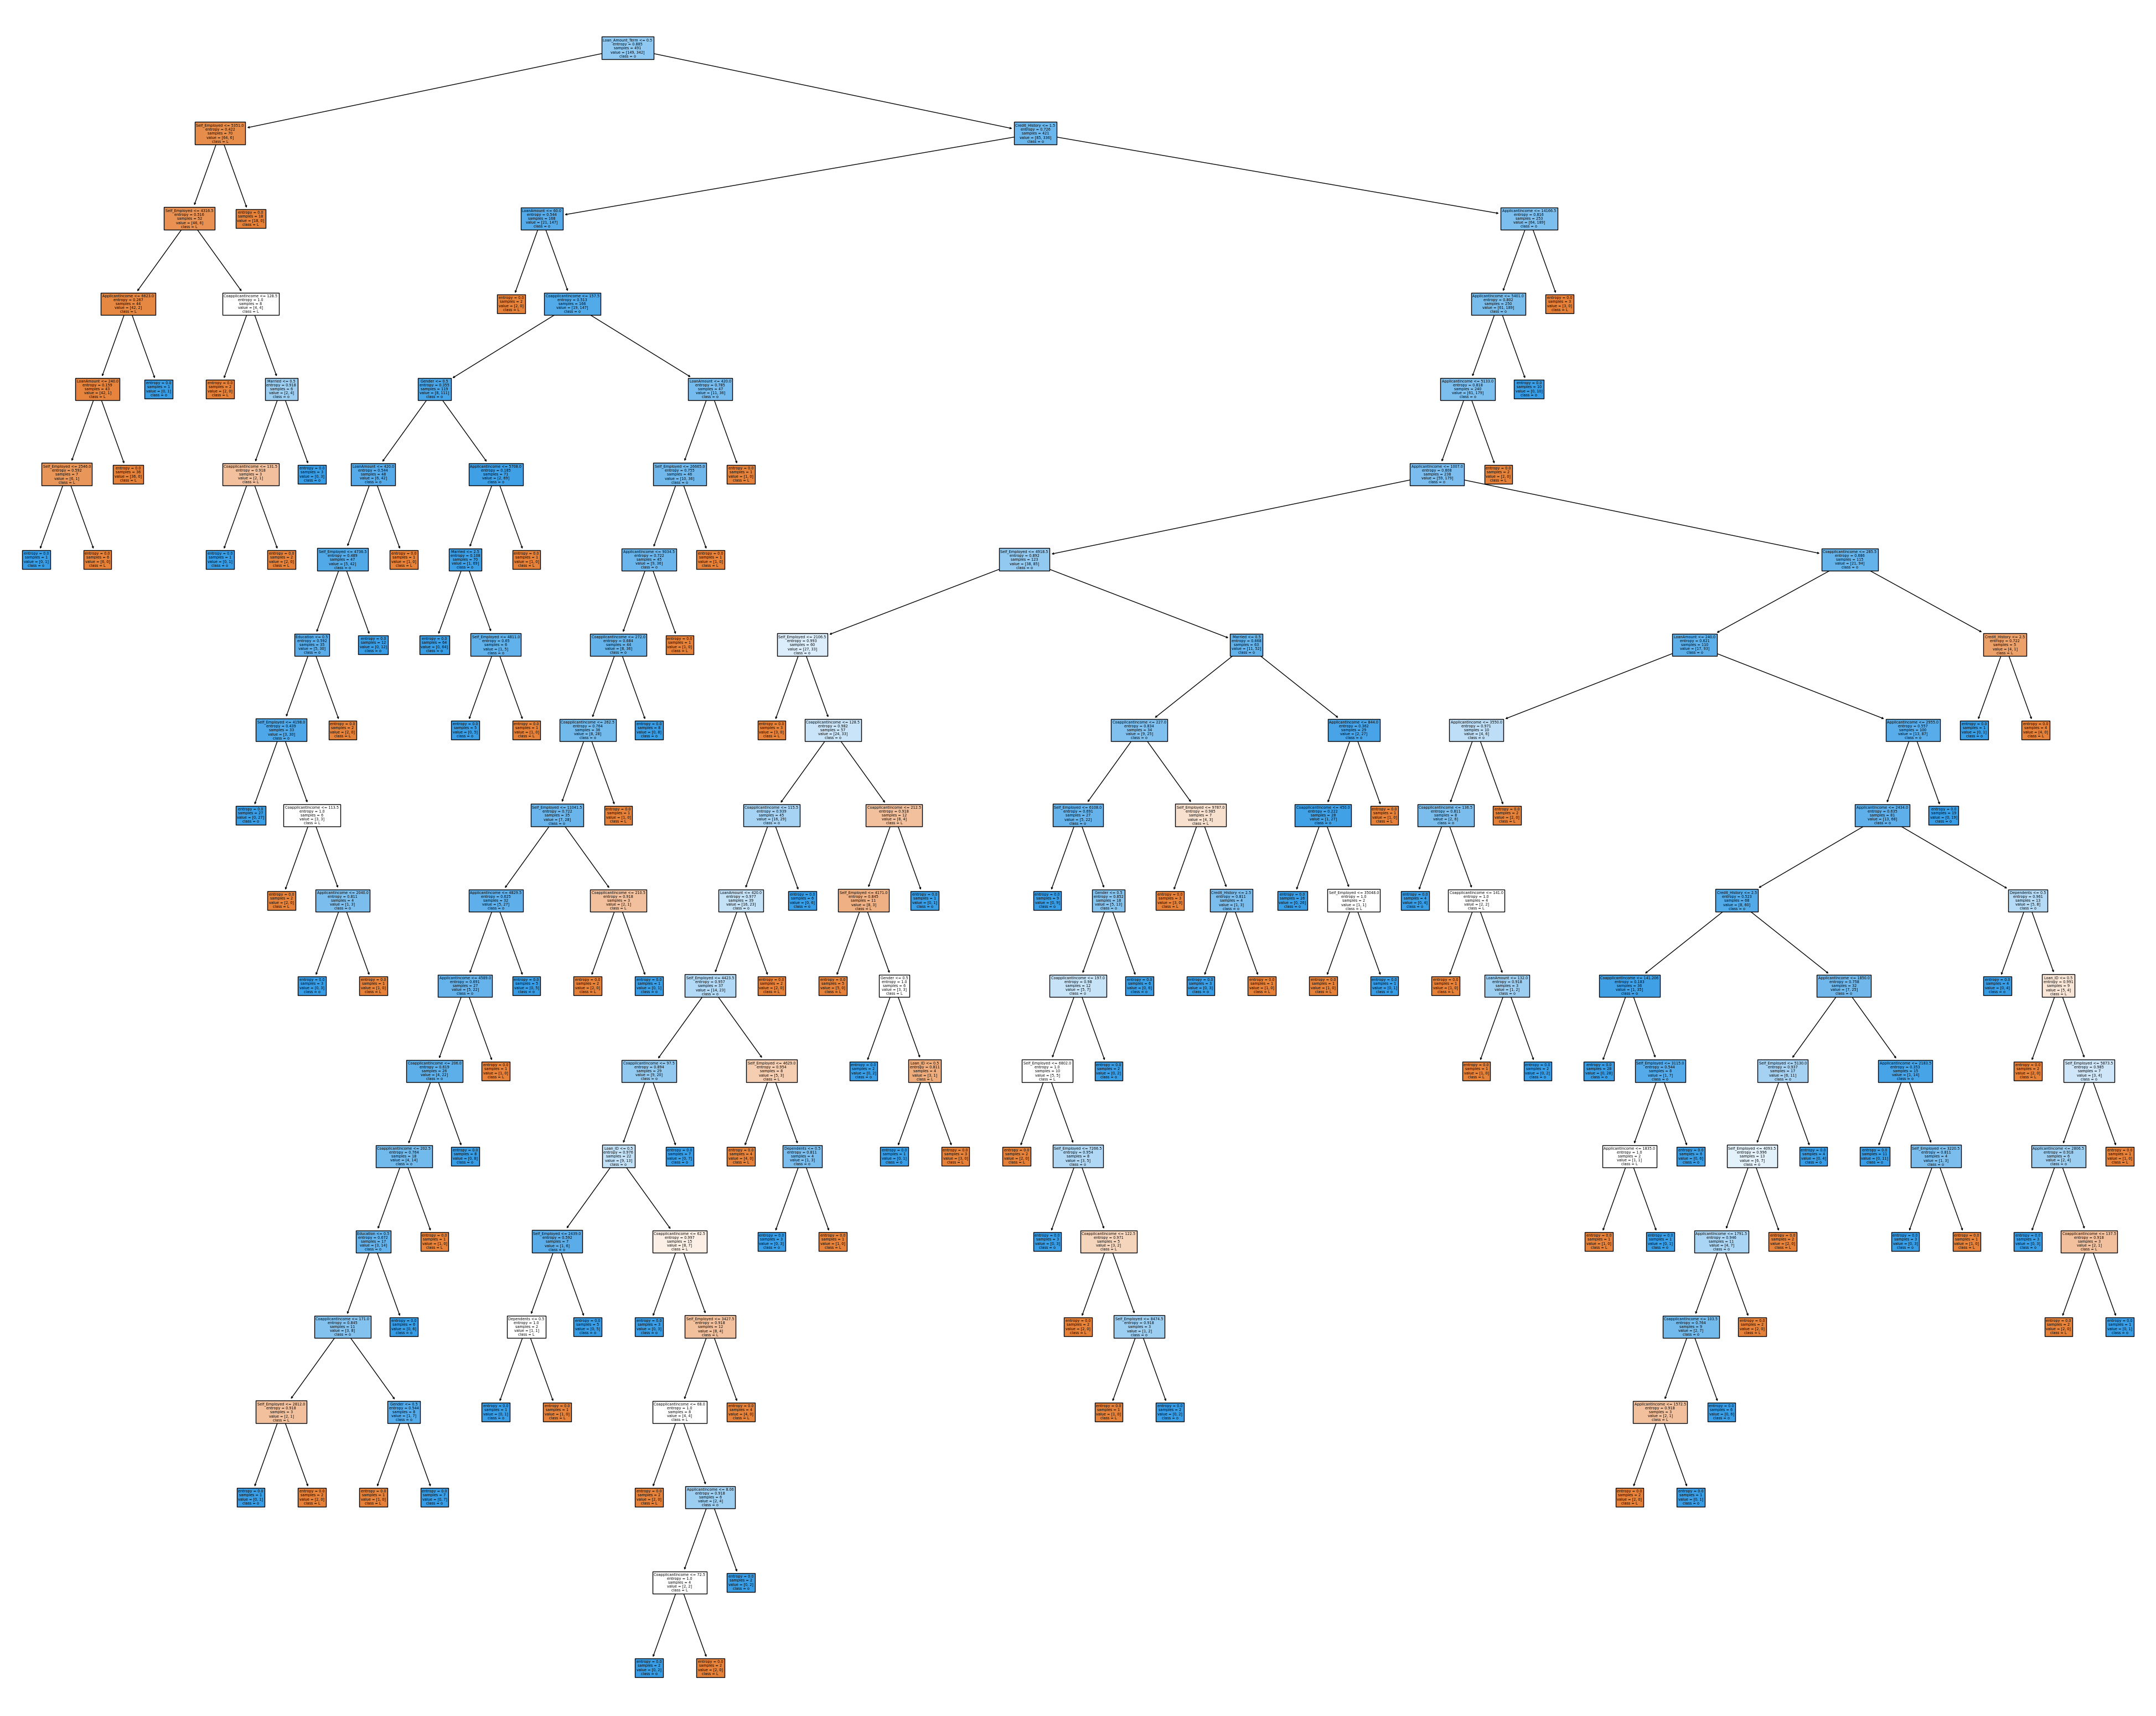

In [49]:
# Plot the decision tree
plt.figure(figsize=(50, 40))
plot_tree(dt, feature_names=list(df.columns[:-1]), class_names='Loan_Status', filled=True)
plt.show()

The tree looks very interesting and we can clearly see that which features are used by the algorithm to classify. We can also confirm that at the top of the entropy is maximum i.e. upto .9, but as we go down the tree close to a decision the entropy gets closer to 0 and ultimately becomes 0 (on leaves). The depth and features are not controlled in this model and we have let the algorithm to decide all that.

## **Model Metrics:**

Since we have an imbalance dataset so we will mostly looking at the F1-score of testing and training datasets.

In [50]:
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,dt_pred_train))
print('Training Set Evaluation Accuracy-Score=>',accuracy_score(Y_train,dt_pred_train))

Training Set Evaluation F1-Score=> 1.0
Training Set Evaluation Accuracy-Score=> 1.0


In [51]:
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test))
print('Training Set Evaluation Accuracy-Score=>',accuracy_score(Y_test,dt_pred_test))

Testing Set Evaluation F1-Score=> 0.8045977011494252
Training Set Evaluation Accuracy-Score=> 0.7235772357723578


In this scenario, the decision tree demonstrates strong performance during in-sample evaluation but experiences a notable decline in performance during out-of-sample evaluation. What could be the reason behind this discrepancy? It appears that our decision tree model is exhibiting overfitting tendencies to the training data. Now, the question arises: Can employing a random forest mitigate this issue? Here the confusion matrix for our model.

### **Confusion Matrix:**

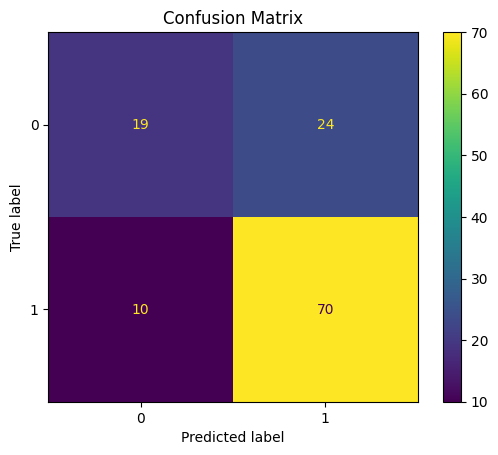

In [52]:
cm = confusion_matrix(Y_test, dt_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

##  **Decision Tree With Selected Features:**

Before trying `Random Forest` let's play around adntry tune and look for optimal parameters to create another decision tree. In the code cell below we are looking for best feature that can cause to achieve maximum F1-score usinf 5 fold cross validation.

In [53]:
X=df.drop(columns=['Loan_ID','Loan_Status'])
Y=df['Loan_Status']


def forward_selection(X, y, feature_names, model, scoring, cv):
    selected_feature_names = []
    best_score = float('-inf')

    while True:
        scores = []
        for feature_name in feature_names:
            if feature_name not in selected_feature_names:
                features_to_try = selected_feature_names + [feature_name]
                X_subset = X[features_to_try]
                score = cross_val_score(model, X_subset, y, scoring=scoring, cv=cv).mean()
                scores.append((score, feature_name))

        if not scores:
            break

        best_score_new, best_feature_name = max(scores)
        if best_score_new > best_score:
            selected_feature_names.append(best_feature_name)
            best_score = best_score_new
        else:
            break

    return selected_feature_names, best_score

model = DecisionTreeClassifier(criterion="entropy")
feature_names = list(X.columns)
scoring = 'f1'
cv = 5


selected_feature_names, best_score = forward_selection(X, Y, feature_names, model, scoring, cv)

print("Selected feature names:", selected_feature_names)
print("Best cross-validation score:", best_score)


Selected feature names: ['Credit_History']
Best cross-validation score: 0.8766952317357394


We can see that the feature that can help us achieve a better F1-score is `Credit_History` i.e. upto .8767, but this cross validation does not give us the best parameters to chose so to make the process easy we will use a little bit of domain knowledge and combine some other parameters that can play a role in the decision making and make another tree.

### **Model:**

For this model we will use `ApplicantIncome`,`CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`,and `Credit_History`. Since all of these parameter can potientially have a big effect on decision making process.

In [54]:
X_selected  = df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']].values
Y_selected = df['Loan_Status'].values

X_trains, X_tests, Y_trains, Y_tests = train_test_split(X_selected, Y_selected, test_size = 0.2, random_state = 42)

In [55]:
model.fit(X_trains, Y_trains)
model_pred_train = model.predict(X_trains)

### **Plot of the Decision Tree:**

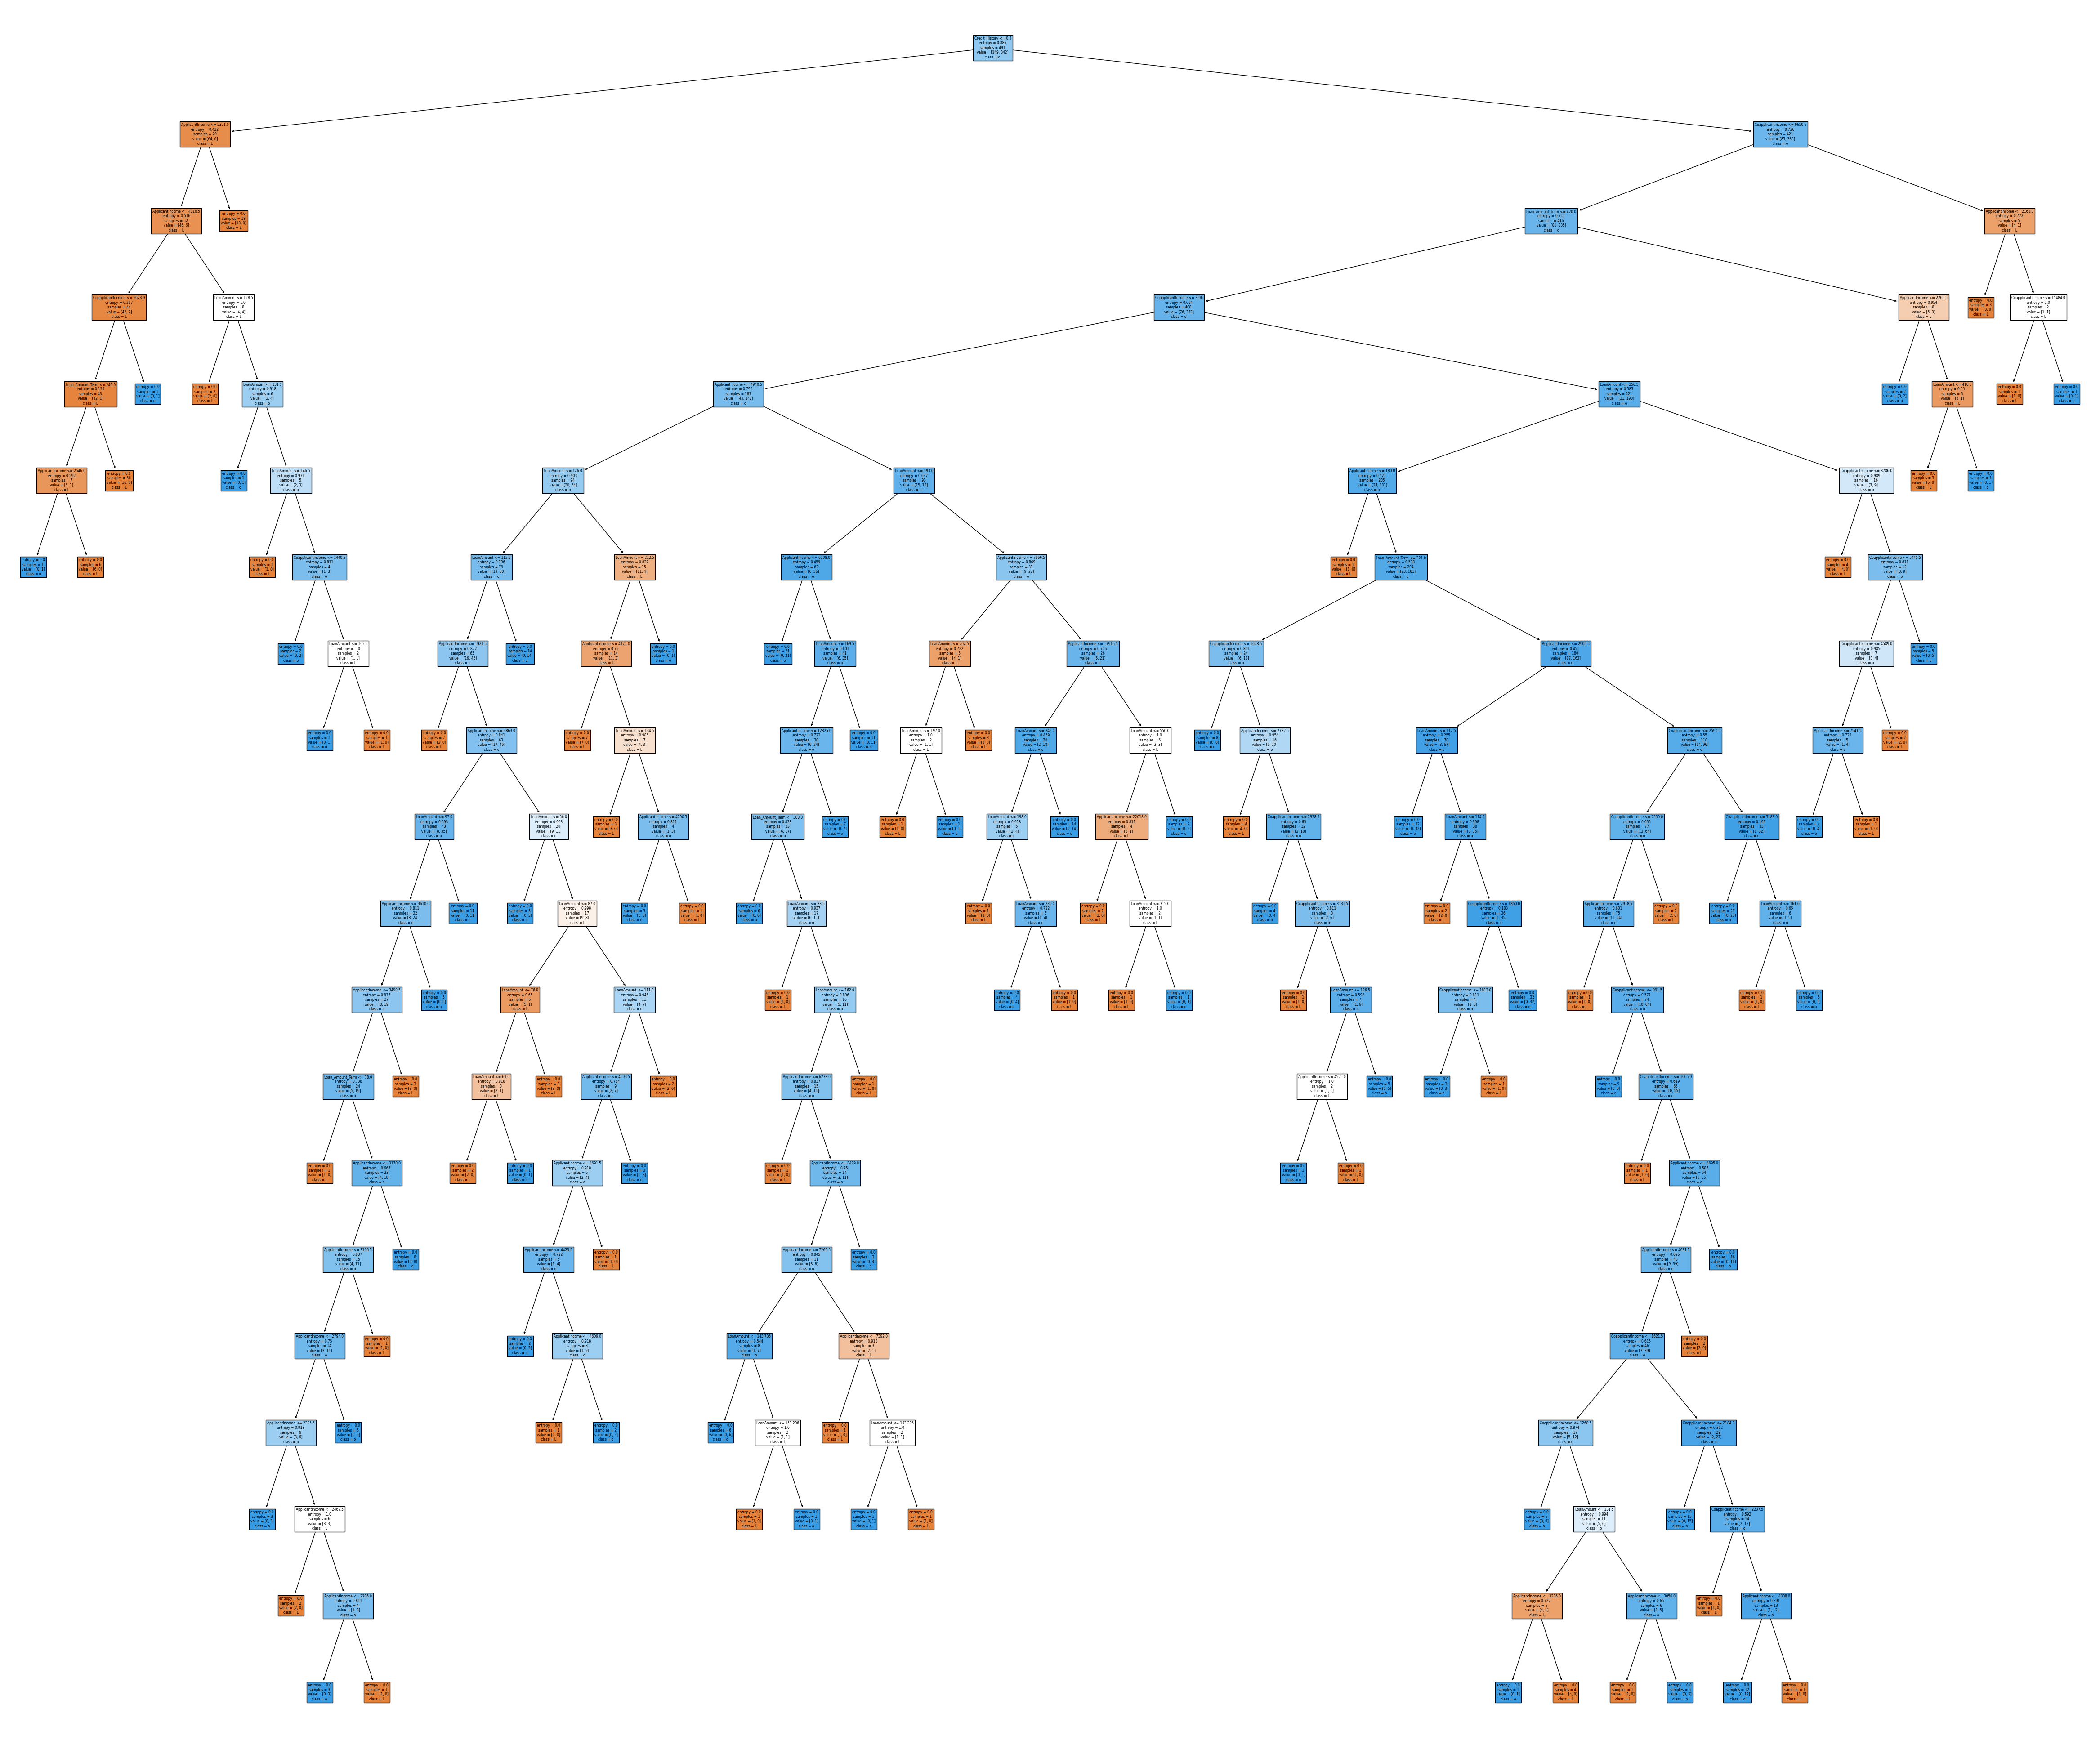

In [56]:
plt.figure(figsize=(60, 50))
plot_tree(model, feature_names=['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History'], class_names='Loan_Status', filled=True)
plt.show()

### **Model Metrics:**

In [57]:
model_pred_test = model.predict(X_tests)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_tests,model_pred_test))

Testing Set Evaluation F1-Score=> 0.8095238095238095


We can see that we achieve a shade lower than previous F1-score mainly because we did not tune our model for the hyper parameter in fact we used cross validation to look for important features so that we can make another tree. Let's look at our Confusion matrix

### **Confusion Matrix:**

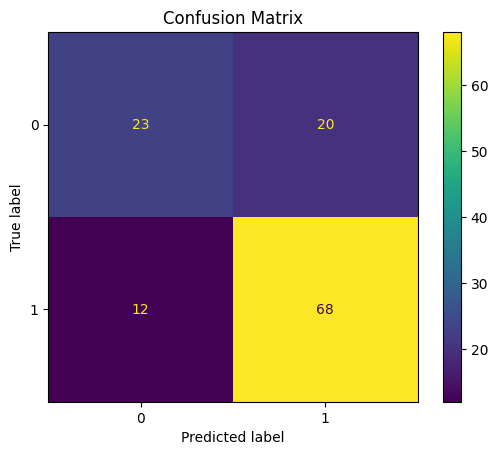

In [58]:
cm = confusion_matrix(Y_tests, model_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

We can confirm some improvement in the True positives and a decline in the correct classfication of True Negatives.

## **Variance Comparison:**

In [74]:
def train_decision_tree(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Define a function to generate multiple datasets and evaluate decision tree variance
def compare_decision_tree_variance(num_datasets, X_train, y_train, X_test, y_test):
    accuracies = []
    for _ in range(num_datasets):
        # Generate a random subset of the training data
        subset_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
        X_train_subset, y_train_subset = X_train[subset_indices], y_train[subset_indices]

        # Train a decision tree on the subset and evaluate its accuracy
        accuracy = train_decision_tree(X_train_subset, y_train_subset, X_test, y_test)
        accuracies.append(accuracy)

    return np.var(accuracies)  # Calculate the variance of accuracies

# Compare the variance of decision trees trained on different subsets
num_datasets = 10
variance_tree1 = compare_decision_tree_variance(num_datasets, X_train, Y_train, X_test, Y_test)
variance_tree2 = compare_decision_tree_variance(num_datasets, X_trains, Y_trains, X_tests, Y_tests)

print("Variance of Decision Tree 1:", variance_tree1)
print("Variance of Decision Tree 2:", variance_tree2)

Variance of Decision Tree 1: 0.0009392557340207554
Variance of Decision Tree 2: 0.0009392557340207542


We can see that both of the trees has almost same variance and the value is low too.

## **Random Forest:**

Now let's create a Random Forest and see how it performs.

### **Model:**

In [ ]:
X=df.drop(columns=['Loan_ID','Loan_Status']).values
Y=df['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 1.0


### **Model Metrics:**

In [ ]:
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test))
print('Testing Set Evaluation Accuracy-Score=>',accuracy_score(Y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.8524590163934427
Testing Set Evaluation Accuracy-Score=> 0.7804878048780488


Here, we can clearly see that the random forest model performed much better than the decision tree in the out-of-sample evaluation. Let's check out the confusion matrix and after that we will discuss the reasons behind why random forest performed better.

### **Confusion Matrix:**

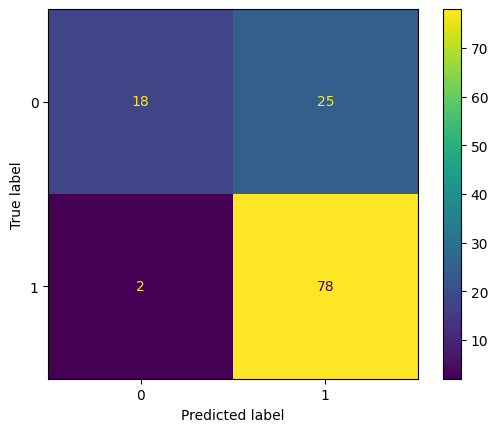

In [ ]:
cm = confusion_matrix(Y_test, rfc_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# **Why Did Our Random Forest Model Outperform the Decision Tree?**

Random Forest harnesses the collective strength of multiple decision trees, avoiding dependence on the feature importance derived from a single decision tree. Let's examine how various algorithms assign importance to different features

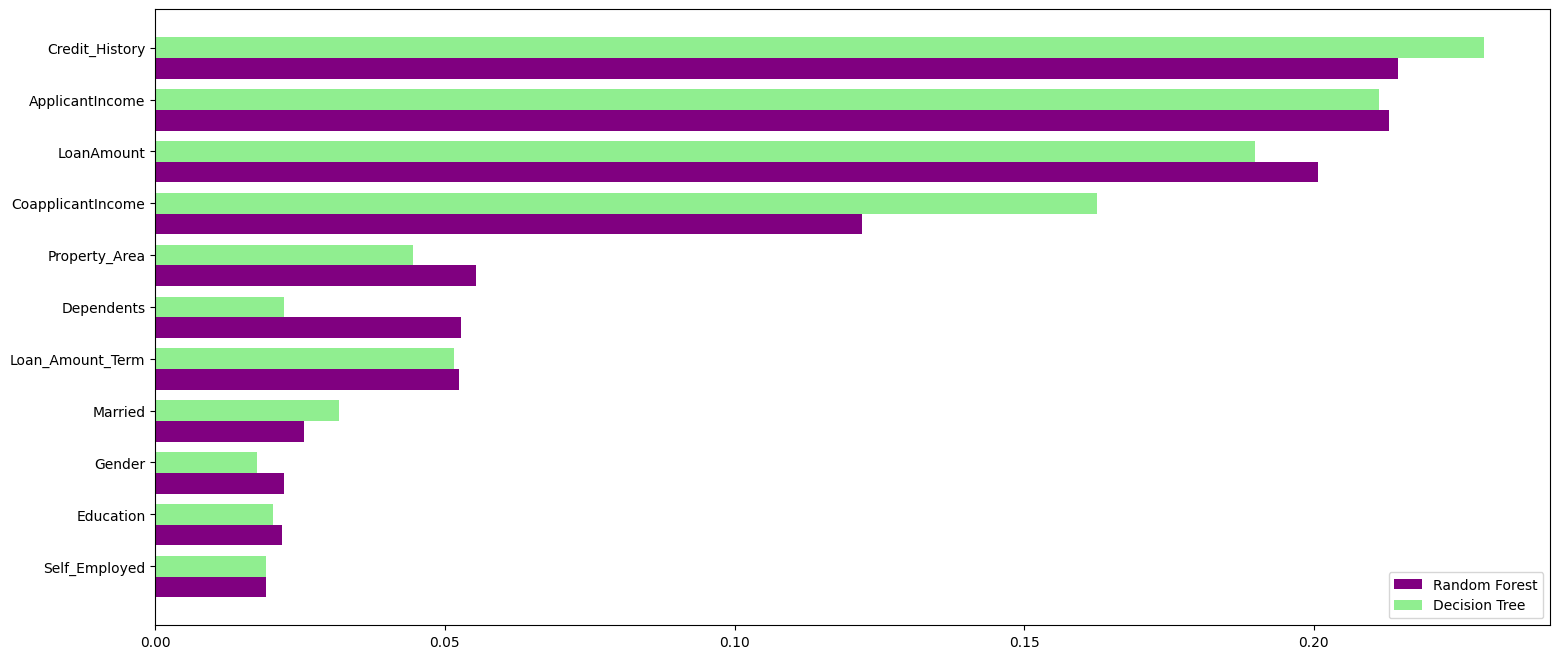

In [ ]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt':dt.feature_importances_
},index=df.drop(columns=['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

From the graph above, it's evident that the decision tree model assigns significant importance to certain features. In contrast, random forest selects features randomly during training, resulting in less reliance on any specific set of features. This unique characteristic distinguishes random forests from bagging trees

# **Conclusion:**

So, what's the final conclusion in the ongoing debate between Random Forest and Decision Tree models? How do we determine which one is superior and which to opt for?

Random Forest proves beneficial when dealing with large datasets where interpretability isn't a primary concern. On the other hand, Decision Trees offer simplicity and clarity in interpretation. Random Forest aggregates results from multiple decision trees, making interpretation more challenging. However, it's not entirely insurmountable, as understanding a Random Forest remains feasible.

Additionally, Random Forest typically requires more training time compared to a single decision tree. This aspect is crucial to consider, especially when faced with tight deadlines in machine learning projects, as the training time escalates with the number of trees in the forest.

Nevertheless, despite potential instability and reliance on specific feature sets, Decision Trees remain valuable due to their ease of interpretation and quicker training. Even individuals with limited data science knowledge can utilize Decision Trees for making rapid data-driven decisions.

# **Essay:**

In the world of machine learning, there are two main ways computers make decisions: Decision Trees and Random Forests. Imagine a bank trying to decide if they should give someone a small loan quickly. With Decision Trees, they might look at the person's borrowing history and financial situation separately. But with Random Forests, they consider both at the same time, like having a group discussion. This can help the bank make better decisions and potentially make more money. Each method has its pros and cons, and it's important to understand them to choose the right one for a specific task.

In order show the differences among different decision tree and random forest we picked a dataset about loan predictions as example. Started off with fxing and imputing the missing values and after that we fixed the wrong data type so that the alogrithm can understand it better. Once that was done, we looked at the data to see what it tells us. We noticed that there was some imbalance when comes to target variable and skewness in some of the continous feature.

After the data was preprocessed we were able to build our models. First, we tried a Decision Tree using all the features in our dataset. This helps the computer learn from the data and make predictions. But sometimes, this method can make mistakes because it focuses too much on the training data. So, we tried again, this time selecting only the most important features. We saw that with less features in the second tree almost had similar accuracy and F1-score to the first one with all the features. We did check difference among the variance of both trees and there was little to no difference found in the variance mainly because we used features that were important and were enough for classfication. Normally, tree with more predictors has high variance.

Next, we explored Random Forests. Random Forests is like a group of Decision Trees working together. They're better at handling complex data and tend to make more accurate predictions. By combining the strengths of multiple trees, Random Forests did give us better results than a single Decision Tree with an F1 score of .85 which was .05 over any Decision Tree

In the end, choosing between Decision Trees and Random Forests depends on the task at hand and the data we have. Each method has its strengths, and understanding them helps us make better decisions in machine learning.